#Install package

In [2]:
!pip install sqlalchemy
!pip install ipython-sql
%load_ext sql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.2 MB/s eta 0:00:00


#Mounting google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Connect to database

In [5]:
%sql sqlite:////content/drive/MyDrive/db/chinook.db

#Database Scheme

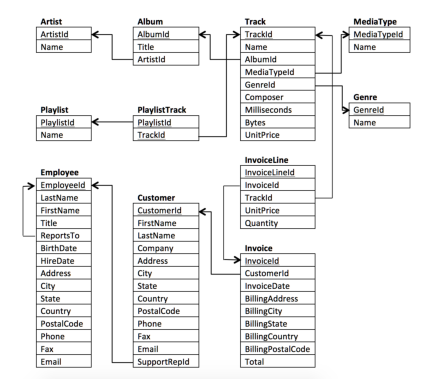

In [8]:
import cv2
from matplotlib import pyplot as plt
image_path = '/content/drive/MyDrive/Personal Project/[SQL] SQL Commands - Chinook Database/Chinook Database Scheme.png'
image = cv2.imread(image_path)
plt.imshow(image)
plt.axis("off")
plt.show()

#Preview all table name except sqlite default table

In [12]:
%%sql
SELECT NAME FROM SQLITE_MASTER WHERE TYPE='table' AND NAME NOT LIKE 'SQLITE_%'

 * sqlite:////content/drive/MyDrive/db/chinook.db
Done.


name
albums
artists
customers
employees
genres
invoices
invoice_items
media_types
playlists
playlist_track


#Queries

##Which countries have the most Invoices?

(SELECT, COUNT, GROUP BY, ORDER BY)

In [14]:
%%sql
SELECT BILLINGCOUNTRY,
  COUNT(INVOICEID)
FROM INVOICES
GROUP BY 1
ORDER BY 2 DESC

 * sqlite:////content/drive/MyDrive/db/chinook.db
Done.


BillingCountry,COUNT(INVOICEID)
USA,91
Canada,56
France,35
Brazil,35
Germany,28
United Kingdom,21
Portugal,14
Czech Republic,14
India,13
Sweden,7


## Create table, insert values, delete values & delete table



In [33]:
%%sql
-- create artists backup table
CREATE TABLE ARTISTS_BACKUP(
   ARTISTID INTEGER PRIMARY KEY AUTOINCREMENT,
   NAME NVARCHAR
);

-- populate data from the artists table
INSERT INTO ARTISTS_BACKUP
SELECT ARTISTID,NAME
FROM ARTISTS;

-- delete item by ID
DELETE FROM artists_backup
WHERE artistid = 1;

-- delete item by value
DELETE FROM artists_backup
WHERE name LIKE '%Santana%';

-- delete table
DELETE FROM artists_backup;

 * sqlite:////content/drive/MyDrive/db/chinook.db
Done.
278 rows affected.
Done.
1 rows affected.
9 rows affected.
268 rows affected.


[]

In [32]:
## Check the results
%%sql
SELECT ARTISTID, NAME
FROM ARTISTS
ORDER BY ARTISTID DESC
LIMIT 3;

 * sqlite:////content/drive/MyDrive/db/chinook.db
Done.


ArtistId,Name
278,Charlie Byrd
277,Candido
276,Buddy Rich


##Show email, first name, and last name of all rock music listeners ordered alphabetically by email.

(SELECT DISTINCT, JOIN, WHERE, ORDER BY)

In [23]:
%%sql
SELECT DISTINCT C.EMAIL,
  C.FIRSTNAME,
  C.LASTNAME
FROM CUSTOMERS C
JOIN INVOICES I ON C.CUSTOMERID = I.CUSTOMERID
JOIN INVOICE_ITEMS IL ON IL.INVOICELINEID = I.INVOICEID
JOIN TRACKS T ON IL.TRACKID = T.TRACKID
JOIN GENRES G ON T.GENREID = G.GENREID
WHERE G.NAME = 'Rock'
ORDER BY 1;

 * sqlite:////content/drive/MyDrive/db/chinook.db
Done.


Email,FirstName,LastName
aaronmitchell@yahoo.ca,Aaron,Mitchell
alero@uol.com.br,Alexandre,Rocha
astrid.gruber@apple.at,Astrid,Gruber
bjorn.hansen@yahoo.no,Bjørn,Hansen
camille.bernard@yahoo.fr,Camille,Bernard
daan_peeters@apple.be,Daan,Peeters
diego.gutierrez@yahoo.ar,Diego,Gutiérrez
dmiller@comcast.com,Dan,Miller
dominiquelefebvre@gmail.com,Dominique,Lefebvre
edfrancis@yachoo.ca,Edward,Francis


##Find albums that have the number of tracks between 18 and 20

(COUNT, GROUP BY, HAVING, BETWEEN, AND, ORDER BY)

In [26]:
%%sql
SELECT ALBUMID, COUNT(TRACKID)
FROM TRACKS
GROUP BY ALBUMID
HAVING COUNT(ALBUMID) BETWEEN 18 AND 20
ORDER BY ALBUMID;

 * sqlite:////content/drive/MyDrive/db/chinook.db
Done.


AlbumId,COUNT(TRACKID)
21,18
37,20
54,20
55,20
72,18
102,18
115,20
145,18
146,18
202,18


##Which artist has earned the most?

(ALIASES, SUBQUERY, GROUP BY, ORDER BY, LIMIT)

In [25]:
%%sql
SELECT  Y.NAME AS ARTIST_NAME,
        SUM(TOTAL) AS GRAND_TOTAL
FROM
  (SELECT	X.NAME,
          X.UNITPRICE * X.QUANTITY AS TOTAL
  FROM
    (SELECT AR.NAME,
            I.UNITPRICE,
            I.QUANTITY
    FROM ARTISTS AR
    JOIN ALBUMS AL ON AR.ARTISTID = AL.ARTISTID
    JOIN TRACKS T ON AL.ALBUMID = T.ALBUMID
    JOIN INVOICE_ITEMS I ON T.TRACKID = I.TRACKID
    ORDER BY 1 DESC) AS X) AS Y
GROUP BY 1
ORDER BY 2 DESC
LIMIT 1

 * sqlite:////content/drive/MyDrive/db/chinook.db
Done.


ARTIST_NAME,GRAND_TOTAL
Iron Maiden,138.5999999999998


## Creating view

In [30]:
%%sql
CREATE VIEW IF NOT EXISTS V_TRACKS
AS
SELECT
	TRACKID,
	T.NAME,
	A.TITLE AS ALBUMS,
	M.NAME AS MEDIA,
	G.NAME AS GENRE
FROM
	TRACKS T
INNER JOIN ALBUMS A ON A.ALBUMID = T.ALBUMID
INNER JOIN MEDIA_TYPES M ON M.MEDIATYPEID = T.MEDIATYPEID
INNER JOIN GENRES G ON G.GENREID = T.GENREID;

SELECT * FROM V_TRACKS LIMIT 10;

 * sqlite:////content/drive/MyDrive/db/chinook.db
Done.
Done.


TrackId,Name,ALBUMS,MEDIA,GENRE
1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You,MPEG audio file,Rock
2,Balls to the Wall,Balls to the Wall,Protected AAC audio file,Rock
3,Fast As a Shark,Restless and Wild,Protected AAC audio file,Rock
4,Restless and Wild,Restless and Wild,Protected AAC audio file,Rock
5,Princess of the Dawn,Restless and Wild,Protected AAC audio file,Rock
6,Put The Finger On You,For Those About To Rock We Salute You,MPEG audio file,Rock
7,Let's Get It Up,For Those About To Rock We Salute You,MPEG audio file,Rock
8,Inject The Venom,For Those About To Rock We Salute You,MPEG audio file,Rock
9,Snowballed,For Those About To Rock We Salute You,MPEG audio file,Rock
10,Evil Walks,For Those About To Rock We Salute You,MPEG audio file,Rock
